# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis & Deborah Hershey"
__contact__   = "jared.marquis@und.edu & deborah.hershey@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [1]:
import numpy as np
import metpy.calc as mpcalc
from metpy.calc import wind_components
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [2]:
file = open("/home/deb/ATSC_270/assignment_2/KBIS_sounding.csv",'r').readlines()

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [3]:
#grabs the first line which is the title of the data

data = pd.read_csv("/home/deb/ATSC_270/assignment_2/KBIS_sounding.csv",header=1)
#print(data)

#add units

#separating variables
pressure = data['pressure[mb]'].values
pressure = pressure*units('millibars')
height = data['height[m]'].values
height = height*units('meters')
temp = data['temperature[degC]'].values
temp = temp*units('degC')
dwp = data['dewpoint[degC]'].values
dwp = dwp*units('degC')


u_new = data['u-wind[m/s]'].values
u_new = u_new*(units('meters')/units('seconds'))
u_new = u_new.to('knots')
v_new = data['v-wind[m/s]'].values
v_new = v_new*(units('meters')/units('seconds'))
v_new = v_new.to('knots')


#assigning units
print(u_new)

[nan nan nan 5.792656587473003 nan nan 4.995680345572354 nan nan nan nan 15.220302375809936 nan nan 30.848812095032397 nan nan nan 38.313174946004324 32.34557235421167 nan 40.02375809935205 nan nan nan 41.83153347732181 nan nan nan nan nan nan 34.54211663066955 nan nan nan nan nan 50.481641468682504 nan nan 68.59827213822895 nan nan nan 69.414686825054 nan 81.3110151187905 78.49244060475164 nan] knot


In [4]:
print(v_new)

[nan nan nan -1.555075593952484 nan nan -8.669546436285097 nan nan nan nan -32.617710583153354 nan nan -66.16846652267819 nan nan nan -105.23974082073435 -120.73218142548596 nan -109.94384449244062 nan nan nan -89.72786177105831 nan nan nan nan nan nan -94.91792656587474 nan nan nan nan nan -72.07775377969763 nan nan -68.59827213822895 nan nan nan -82.73002159827215 nan -81.3110151187905 -78.49244060475164 nan] knot


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

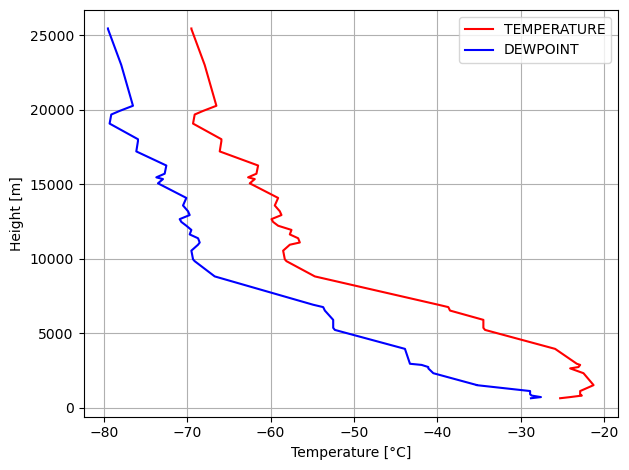

In [5]:
#create a figure
#create subplot

fig, ax = plt.subplots()

#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
ax.plot(temp,height,c='red',label = "TEMPERATURE")
#plot dewpoint in blue
#give it the label of DEWPOINT
ax.plot(dwp,height,c='blue',label = 'DEWPOINT')
#add a background grid
ax.grid()
#add a x label with units (including the degree symbol) - google it and figure it out :)
#add a y label with units 
ax.set(xlabel = u'Temperature [\N{DEGREE SIGN}C]',ylabel = f'Height [m]')
#add a legend
ax.legend()
#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png',dpi=150)

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

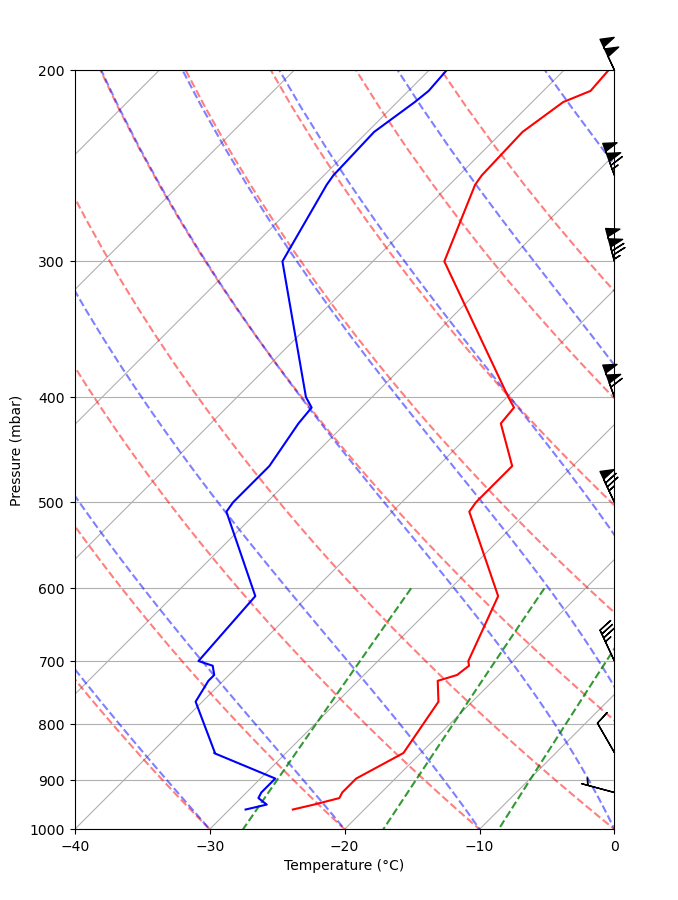

In [6]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = [9,9],dpi = 100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
skew.ax.set_xlabel(f'Temperature ({temp.units:~P})')
skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})') 


#add temperature in red
skew.plot(pressure,temp,'r')
#add dewpoint in blue
skew.plot(pressure,dwp,'blue')

#plot wind barbs
skew.plot_barbs(pressure,u_new,v_new)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,0)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,200)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png',dpi=150)

### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

In [7]:
#remove nans from u and v
u = data['u-wind[m/s]']
v = data['v-wind[m/s]']

u_hodo = u.dropna()
v_hodo = v.dropna()

u_hodo = u_hodo.values
u_hodo = u_hodo*(units('meters')/units('seconds'))
u_hodo = u_hodo.to('knots')

v_hodo = v_hodo.values
v_hodo = v_hodo*(units('meters')/units('seconds'))
v_hodo = v_hodo.to('knots')

print(v_hodo)

[-1.555075593952484 -8.669546436285097 -32.617710583153354 -66.16846652267819 -105.23974082073435 -120.73218142548596 -109.94384449244062 -89.72786177105831 -94.91792656587474 -72.07775377969763 -68.59827213822895 -82.73002159827215 -81.3110151187905 -78.49244060475164] knot


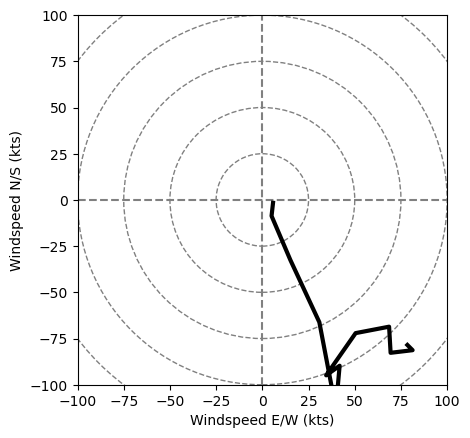

In [8]:
#create the hodograph (have the range from 0-100kts with 25kt increment)
#make the wind curve black
hodo = Hodograph(component_range=100)
hodo.add_grid(increment=25)
hodo.plot(u_hodo,v_hodo,color = "black")

#add x and y labels
hodo.ax.set(xlabel = f'Windspeed E/W (kts)', ylabel = f'Windspeed N/S (kts)')
#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png
plt.savefig('hodo.png',dpi=150)

### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

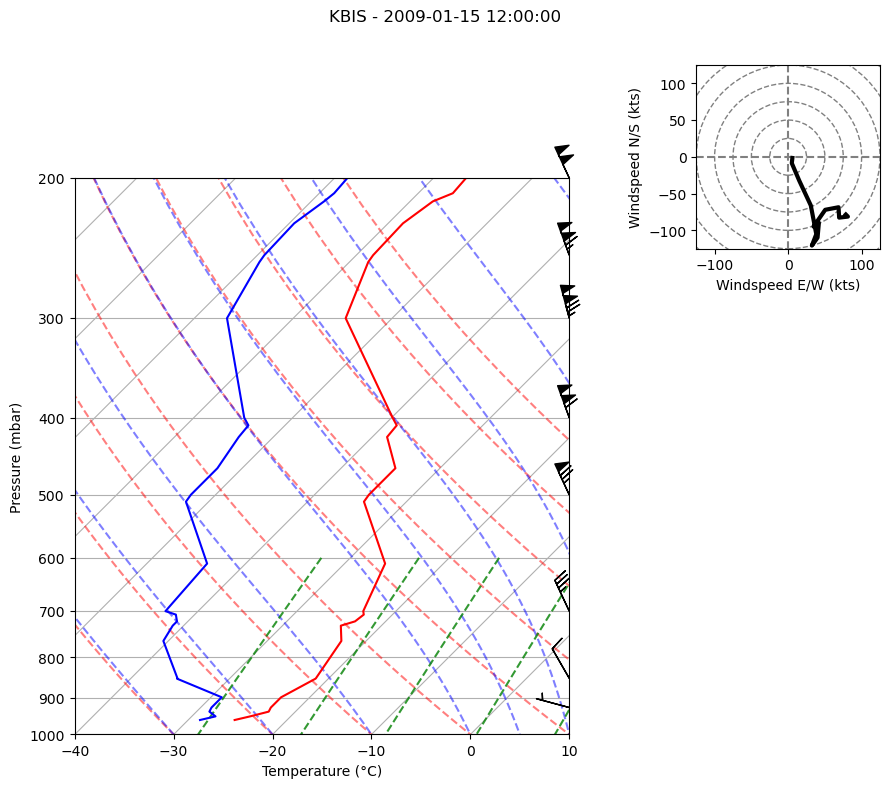

In [9]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
skew.ax.set_xlabel(f'Temperature ({temp.units:~P})')
skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})') 


#add temperature in red
skew.plot(pressure,temp,'r')
#add dewpoint in blue
skew.plot(pressure,dwp,'blue')

#plot wind barbs
skew.plot_barbs(pressure,u_new,v_new)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,10)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,200)

#add a hodograph
ax = fig.add_subplot(gs[0,-1])
hodo = Hodograph(ax = ax, component_range=125)
hodo.add_grid(increment=25)
hodo.plot(u_hodo,v_hodo,color = "black")

#add x and y labels
hodo.ax.set(xlabel = f'Windspeed E/W (kts)', ylabel = f'Windspeed N/S (kts)')

#add a title with the date and launch location:
title = "KBIS - 2009-01-15 12:00:00"
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
plt.savefig('skew_hodo.png',dpi=150)

### Plotting Advanced Skew-T with CAPE ###

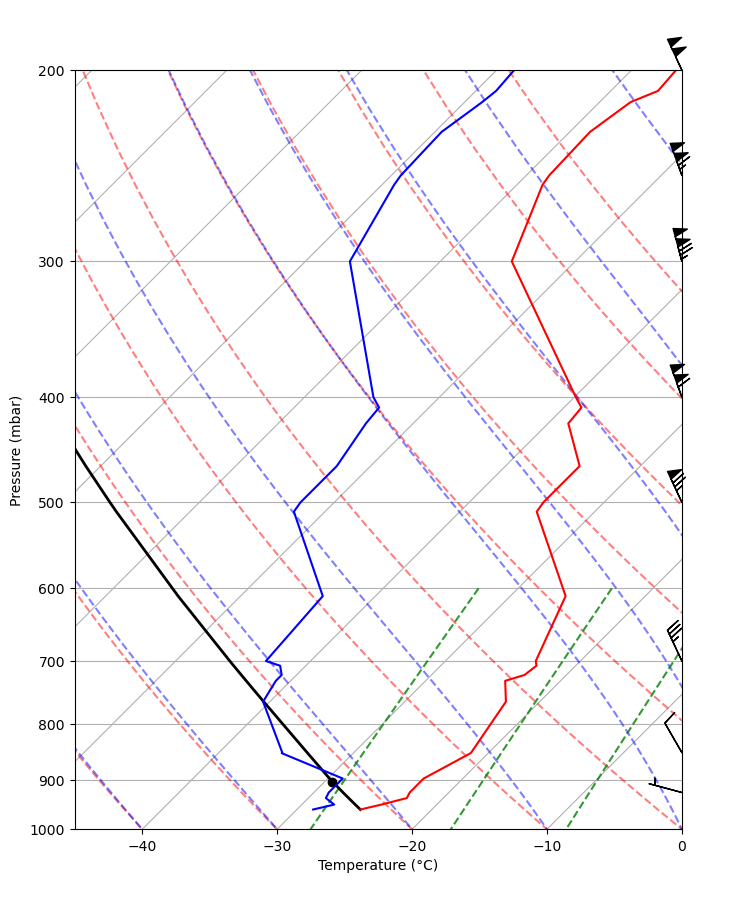

In [10]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = [9,9],dpi = 100)
#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
skew.ax.set_xlabel(f'Temperature ({temp.units:~P})')
skew.ax.set_ylabel(f'Pressure ({pressure.units:~P})') 

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temp[0], dwp[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = mpcalc.parcel_profile(pressure, temp[0], dwp[0]).to('degC')
skew.plot(pressure, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(pressure, temp, prof, dwp)
skew.shade_cape(pressure, temp, prof)

#add temperature in red
skew.plot(pressure,temp,'r')
#add dewpoint in blue
skew.plot(pressure,dwp,'blue')

#plot wind barbs
skew.plot_barbs(pressure,u_new,v_new)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-45,0)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000,200)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as AdvancedSkewT.png
plt.savefig('AdvancedSkewT.png',dpi=150)

### Testing other super cold soundings ###

In [24]:
df2 = pd.read_csv("AS-20110814_0000Z.txt",delim_whitespace = True,skiprows=8,usecols=[0,1,2,3,6,7],names = ["pressure","height","temp","dwpt","wind_drct","speed_kts"])
print(df2)

    pressure  height  temp  dwpt  wind_drct  speed_kts
0      694.0    2835 -65.5 -72.5         95          2
1      693.0    2844 -63.7 -71.7         70         12
2      692.0    2853 -61.9 -70.9         65         13
3      690.0    2871 -58.3 -69.3         60         13
4      687.0    2899 -48.1 -56.1         53         12
5      685.0    2918 -46.1 -53.1         48         12
6      682.0    2947 -45.6 -51.0         40         11
7      679.0    2977 -45.1 -49.0         40         11
8      674.0    3026 -41.1 -44.2         39         11
9      657.0    3201 -37.9 -41.4         38         11
10     572.0    4151 -39.7 -47.7         29         11
11     560.0    4296 -40.3 -45.0         27         11
12     500.0    5060 -45.1 -49.6         20         11
13     487.0    5234 -46.4 -50.1         10          7
14     476.0    5386 -47.5 -50.6         13          8
15     400.0    6510 -55.9 -60.3         35         12
16     386.0    6736 -57.7 -62.1         38         12
17     378

In [25]:
#separating variables
p = df2['pressure'].values
p = p*units('millibars')
h = df2['height'].values
h = h*units('meters')
t = df2['temp'].values
t = t*units('degC')
dwpt = df2['dwpt'].values
dwpt = dwpt*units('degC')
wsd = df2['speed_kts'].values
wsd = wsd*units('knots')
direct = df2['wind_drct'].values
direct = direct*units('deg')

u2,v2 = wind_components(wsd,direct) #already comes out as knots

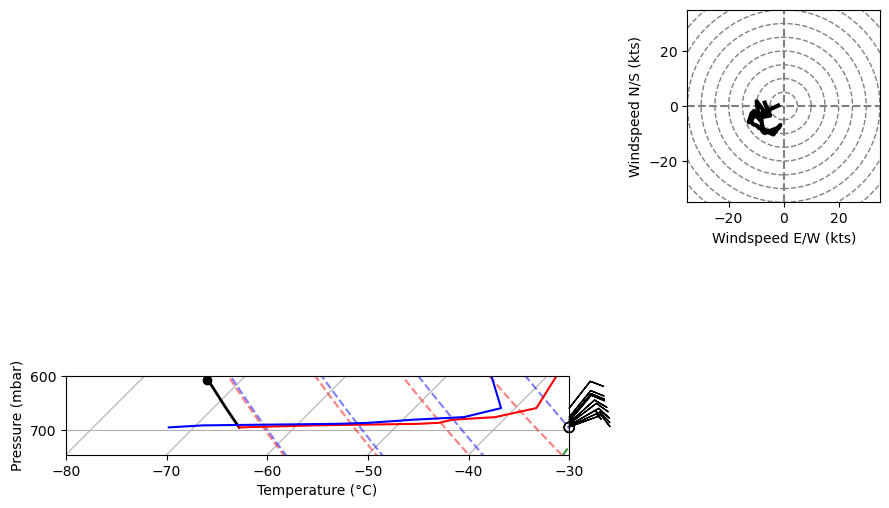

In [29]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
skew.ax.set_xlabel(f'Temperature ({t.units:~P})')
skew.ax.set_ylabel(f'Pressure ({p.units:~P})') 

# Calculate LCL height and plot as black dot. Because `p`'s first value is
# ~1000 mb and its last value is ~250 mb, the `0` index is selected for
# `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
# i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
# should be selected.
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], t[0], dwpt[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof2 = mpcalc.parcel_profile(p, t[0], dwpt[0]).to('degC')
skew.plot(p, prof2, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, t, prof2, dwpt)
skew.shade_cape(p, t, prof2)

#add temperature in red
skew.plot(p,t,'r')
#add dewpoint in blue
skew.plot(p,dwpt,'blue')

#plot wind barbs
skew.plot_barbs(p,u2,v2)

ax = fig.add_subplot(gs[0,-1])
hodo = Hodograph(ax = ax, component_range=35)
hodo.add_grid(increment=5)
hodo.plot(u2,v2,color = "black")

#add x and y labels
hodo.ax.set(xlabel = f'Windspeed E/W (kts)', ylabel = f'Windspeed N/S (kts)')

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-80,-30)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(750,600)
#to make sure everything looks okay
fig.tight_layout()

#save the skew T as AdvancedSkewT.png
plt.savefig('AdvancedSkewT-Antartica.png',dpi=150)